In [1]:
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
M = 5

In [3]:
functions_to_call = [
    "rfsf_trp", "rfsf_cs", "rfsf_dp2", "rfsf_dp1",
]

In [4]:
renamed_functions = [
    "RFSF-TRP", "RFSF-TS", "RFSF-DP", "RFSF-DP-1D",
]

In [5]:
L = [10] + [int(10 ** x) for x in np.linspace(2, 6, num=4*5 + 1)]

In [6]:
feature_map_size = [M*l + 1 for l in L]
feature_map_dp = [(2**(M+1) - 1)*l + 1 for l in L]

In [10]:
with open("../sauron_results_2/rff_size_accuracy/brownian.pkl", "rb") as f:
    accuracy_measurements = pickle.load(f)

In [11]:
rmse_results = []
mape_results = []
for i, l in enumerate(L):
    rmse_row = []
    mape_row = []
    for j, name in enumerate(functions_to_call):
        accuracy = accuracy_measurements[(name, l)]
        if accuracy == None:
            rmse_output = np.nan
            mape_output = np.nan
        else:
            # cpu_peak
            rmse_output = accuracy[0]
            # used_bytes
            mape_output = accuracy[1]
        rmse_row.append(rmse_output)
        mape_row.append(mape_output)
    rmse_results.append(rmse_row)
    mape_results.append(mape_row)

In [12]:
rmse_df = pd.DataFrame(rmse_results, index = L, columns=renamed_functions).round(3)

In [13]:
mape_df = pd.DataFrame(mape_results, index = L, columns=renamed_functions).round(3)

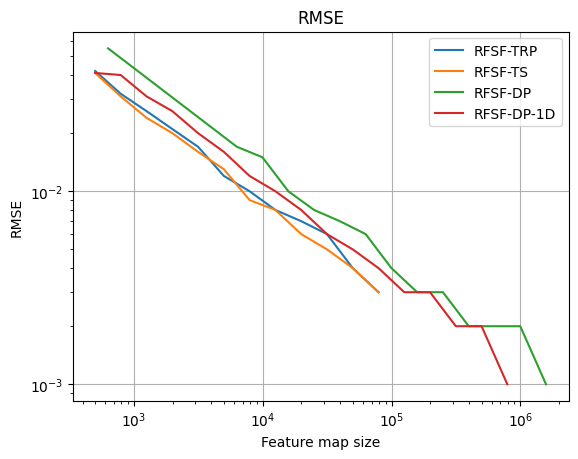

In [14]:
df = rmse_df
for name, idx in zip(renamed_functions,
                    [feature_map_size, feature_map_size,
                    feature_map_dp, feature_map_size]):
    if name != "RFSF-DP":
        plt.plot(idx[1:], df[name][1:], label=name)
    else:
        plt.plot(idx, df[name], label=name)
plt.legend()
plt.loglog()
plt.xlabel(r"Feature map size")
plt.ylabel(r"RMSE")
plt.title("RMSE")
plt.grid()

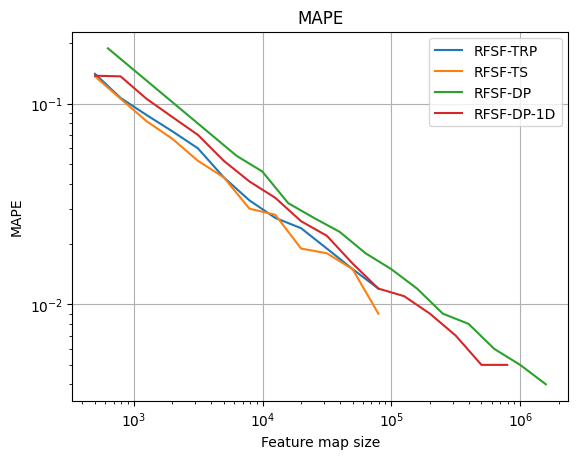

In [15]:
df = mape_df
for name, idx in zip(renamed_functions,
                    [feature_map_size, feature_map_size,
                    feature_map_dp, feature_map_size]):
    if name != "RFSF-DP":
        plt.plot(idx[1:], df[name][1:], label=name)
    else:
        plt.plot(idx, df[name], label=name)
plt.legend()
plt.loglog()
plt.xlabel(r"Feature map size")
plt.ylabel(r"MAPE")
plt.title("MAPE")
plt.grid()